In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','notebook'])

Testing if the `CUDA` compatible GPU device is available

In [2]:
if torch.cuda.is_available(): 
    dev = "cuda:0" 
else: 
    dev = "cpu" 
device = torch.device(dev) 
print(device)

cuda:0


In [3]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

In [4]:
M1 = nn.Linear(2,8,bias=False)
M1

Linear(in_features=2, out_features=8, bias=False)

In [5]:
M1(x)

tensor([[ 1.8559, -2.9517, -2.3530,  0.1381, -0.8432, -4.2936, -0.1155, -1.2812],
        [ 1.3534, -2.6507, -2.1846, -0.0561, -0.5119, -3.6025, -0.2039, -0.9234],
        [-1.2365, -2.0198, -2.1823, -1.3467,  1.3855, -0.9119, -0.8811,  0.9410],
        [ 0.0398, -5.5444, -5.2066, -1.7222,  1.1145, -5.2790, -1.3197,  0.0927]],
       grad_fn=<MmBackward0>)

In [6]:
M2 = nn.Linear(8,1,bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [7]:
M2(M1(x)).squeeze()

tensor([1.4166, 1.4281, 2.2165, 4.3758], grad_fn=<SqueezeBackward0>)

In [8]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2, 16, bias=False)
        self.Matrix2 = nn.Linear(16, 8, bias=False)
        self.Matrix3 = nn.Linear(8, 1, bias=False)

    def forward(self, x):
        x_layer1 = self.Matrix1(x)
        x_layer2 = self.Matrix2(x_layer1)
        x_layer3 = self.Matrix3(x_layer2)
        x_forward = x_layer3.squeeze()
        return x_forward

In [9]:
f = MyNeuralNetwork()

In [10]:
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[-0.1558, -0.6079],
        [ 0.5316,  0.0657],
        [ 0.4633, -0.2690],
        [ 0.3595, -0.5159],
        [ 0.1943, -0.6449],
        [ 0.4143,  0.3771],
        [-0.2187,  0.1739],
        [ 0.5662,  0.0392],
        [ 0.6656, -0.2092],
        [-0.1377,  0.6228],
        [ 0.5850, -0.6688],
        [-0.3561,  0.6218],
        [ 0.2558,  0.4359],
        [ 0.3878, -0.6514],
        [ 0.5377, -0.1441],
        [ 0.5279, -0.0258]], requires_grad=True)
Parameter containing:
tensor([[ 0.2465, -0.0083, -0.1195, -0.1027, -0.0807, -0.2109,  0.1108, -0.2181,
         -0.1823,  0.1603, -0.0208,  0.0244,  0.0278,  0.0586,  0.0702,  0.2057],
        [ 0.1119, -0.1691, -0.1604, -0.0228,  0.0899, -0.1128, -0.1337, -0.1547,
          0.1360,  0.1362,  0.1786, -0.1623, -0.1536,  0.2056,  0.0146,  0.1928],
        [-0.1752, -0.1441,  0.0661,  0.0122,  0.2403,  0.0449,  0.0519, -0.0551,
          0.2204,  0.0340,  0.1393, -0.1763,  0.0018, -0.1458,  0.1394, -0.0737]

In [11]:
y_hat = f(x)
y_hat

tensor([0.0745, 0.0895, 0.2318, 0.3886], grad_fn=<SqueezeBackward0>)

In [12]:
L = nn.MSELoss()
L(y, y_hat)

tensor(12.3403, grad_fn=<MseLossBackward0>)

In [13]:
torch.mean((y-y_hat)**2)

tensor(12.3403, grad_fn=<MeanBackward0>)

In [14]:
optimizer = SGD(f.parameters(), lr=0.001)

In [15]:
losses = []
for _ in range(1000):
    optimizer.zero_grad()
    loss_value = L(f(x), y)
    loss_value.backward()
    optimizer.step()
    losses.append(loss_value.item())

Text(0.5, 0, 'Epochs')

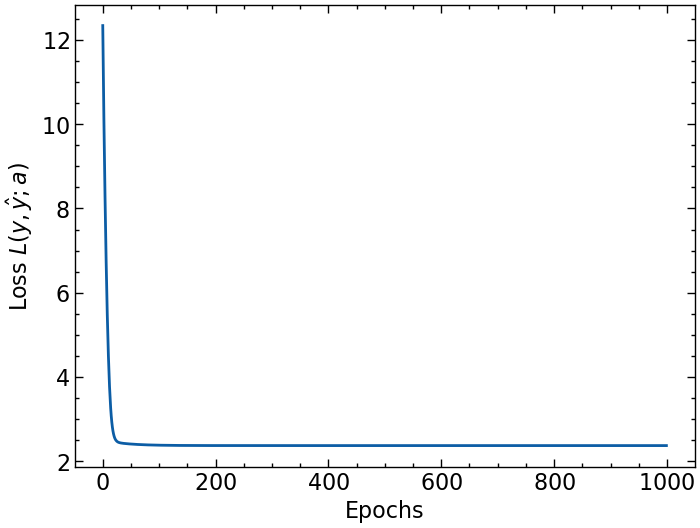

In [16]:
plt.plot(losses)
plt.ylabel('Loss $L(y,\hat{y};a)$')
plt.xlabel('Epochs')

In [17]:
y

tensor([1., 5., 2., 5.])

In [18]:
f(x)

tensor([2.7776, 2.4993, 1.9397, 5.2712], grad_fn=<SqueezeBackward0>)